In [1]:
# -*- coding: utf-8 -*-
# -*- authors : Vincent Roduit, Filippo Quadri -*-
# -*- date : 2024-05-03 -*-
# -*- Last revision: 2024-05-03 -*-
# -*- python version : 3.9.18 -*-
# -*- Description: Notebook that summarize results-*-

# <center> EE - 451 Image Analysis and Pattern recognition </center>
## <center> Ecole Polytechnique Fédérale de Lausanne </center>
### <center>Coin Challenge </center>
---

In [546]:
#Import libraries
import os
import numpy as np
import torch
import importlib
import skimage as sk
from skimage.color import rgb2hsv
import matplotlib.pyplot as plt
from typing import Callable
import cv2 as cv
from skimage.morphology import closing, opening, disk, remove_small_holes, remove_small_objects
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [618]:
#Import files
from data_classes.ref_data import refCoin
from data_classes.train_data import trainCoin
from data_classes.test_data import testCoin
import constants
from visualization import *
importlib.reload(constants)
from processing.process_func import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Load different Datasets

In [4]:
ref_data = refCoin()

Loading data from pickle files


In [47]:
train_data = trainCoin()

Loading data from pickle files


In [52]:
test_data = testCoin()

Loading data from pickle files


In [63]:
train_data.process_images()

/Users/vincentroduit/Documents/document_vincent/epfl/master/ma2/image_analysis/EE-451-IAPR/project/src/processing/process_func.py:184: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  img_removed_small_holes = remove_small_holes(img_closing, 1000)


In [7]:
from bullshit import *

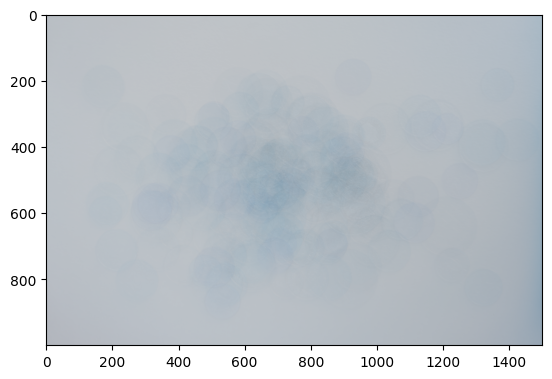

In [69]:
plt.imshow(train_data.ref_bg['neutral_bg'])

In [102]:
from copy import deepcopy
imgs = deepcopy(train_data.raw_data['hand'])
imgs_array = np.array(imgs)

imgs_mean = train_data.ref_bg['hand']

for idx, img in enumerate(imgs_array):
    img = img.astype(np.uint8)
    img = img - 0.9 * imgs_mean
    img_thresholded = apply_rgb_threshold(img, 0, 0, 0)
    img_opening = closing(img_thresholded, disk(5))
    img_opening = opening(img_opening, disk(5))
    img_removed_small_holes = remove_small_holes(img_opening, 1000)
    
    # Create a figure without displaying it
    plt.figure()
    
    # Plot the image
    plt.imshow(img_thresholded, interpolation='nearest', cmap='gray')
    
    # Save the figure directly without displaying it
    plt.savefig(f'../data/results/neutral_bg_outliers/img_{idx}.png')
    
    # Close the figure to free up memory
    plt.close()

/var/folders/s1/42fm0bb102l1htv_jw4lwy6m0000gn/T/ipykernel_2814/4223017828.py:13: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  img_removed_small_holes = remove_small_holes(img_opening, 1000)


In [924]:
imgs = deepcopy(train_data.raw_data['hand'])
imgs_array = np.array(imgs)

for idx, img in enumerate(imgs_array):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_original = deepcopy(img)
    img_final = apply_hsv_threshold(img, my_trheshold_func)
    img_final = closing(img_final, disk(3))
    img_final = remove_small_holes(img_final, 5000)
    img_final = remove_small_objects(img_final, 5000)
    img_final = remove_large_objects(img_final, max_size=60000)
    img_final = img_final.astype(np.uint8)
    masked_img = cv2.bitwise_and(img_original, img_original, mask=img_final)
    img_contours = detect_coin(masked_img, 20, 100, 3)
    plt.figure()
    plt.imshow(img_contours, interpolation='nearest', cmap='gray')
    plt.savefig(f'../data/results/hand/img_{idx}.png')
    
    # Close the figure to free up memory
    plt.close()
    

/var/folders/s1/42fm0bb102l1htv_jw4lwy6m0000gn/T/ipykernel_2814/2067893458.py:9: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  img_final = remove_small_holes(img_final, 5000)


[     0. 186454.  29485.]


/var/folders/s1/42fm0bb102l1htv_jw4lwy6m0000gn/T/ipykernel_2814/836897049.py:6: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  img_final = remove_small_holes(img_final, 1000)


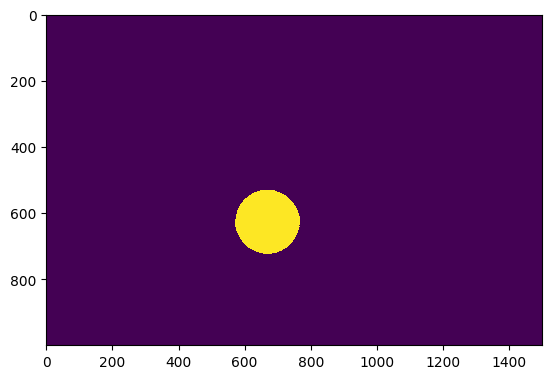

In [906]:
img_test = imgs_array[6]
img_test = cv.cvtColor(img_test, cv.COLOR_BGR2RGB)
img_original = deepcopy(img_test)
img_final = apply_hsv_threshold(img_test, my_trheshold_func)
img_final = closing(img_final, disk(4))
img_final = remove_small_holes(img_final, 1000)
img_final = remove_small_objects(img_final, 5000)
img_final = remove_large_objects(img_final, max_size=30000)
plt.imshow(img_final, interpolation='nearest')    

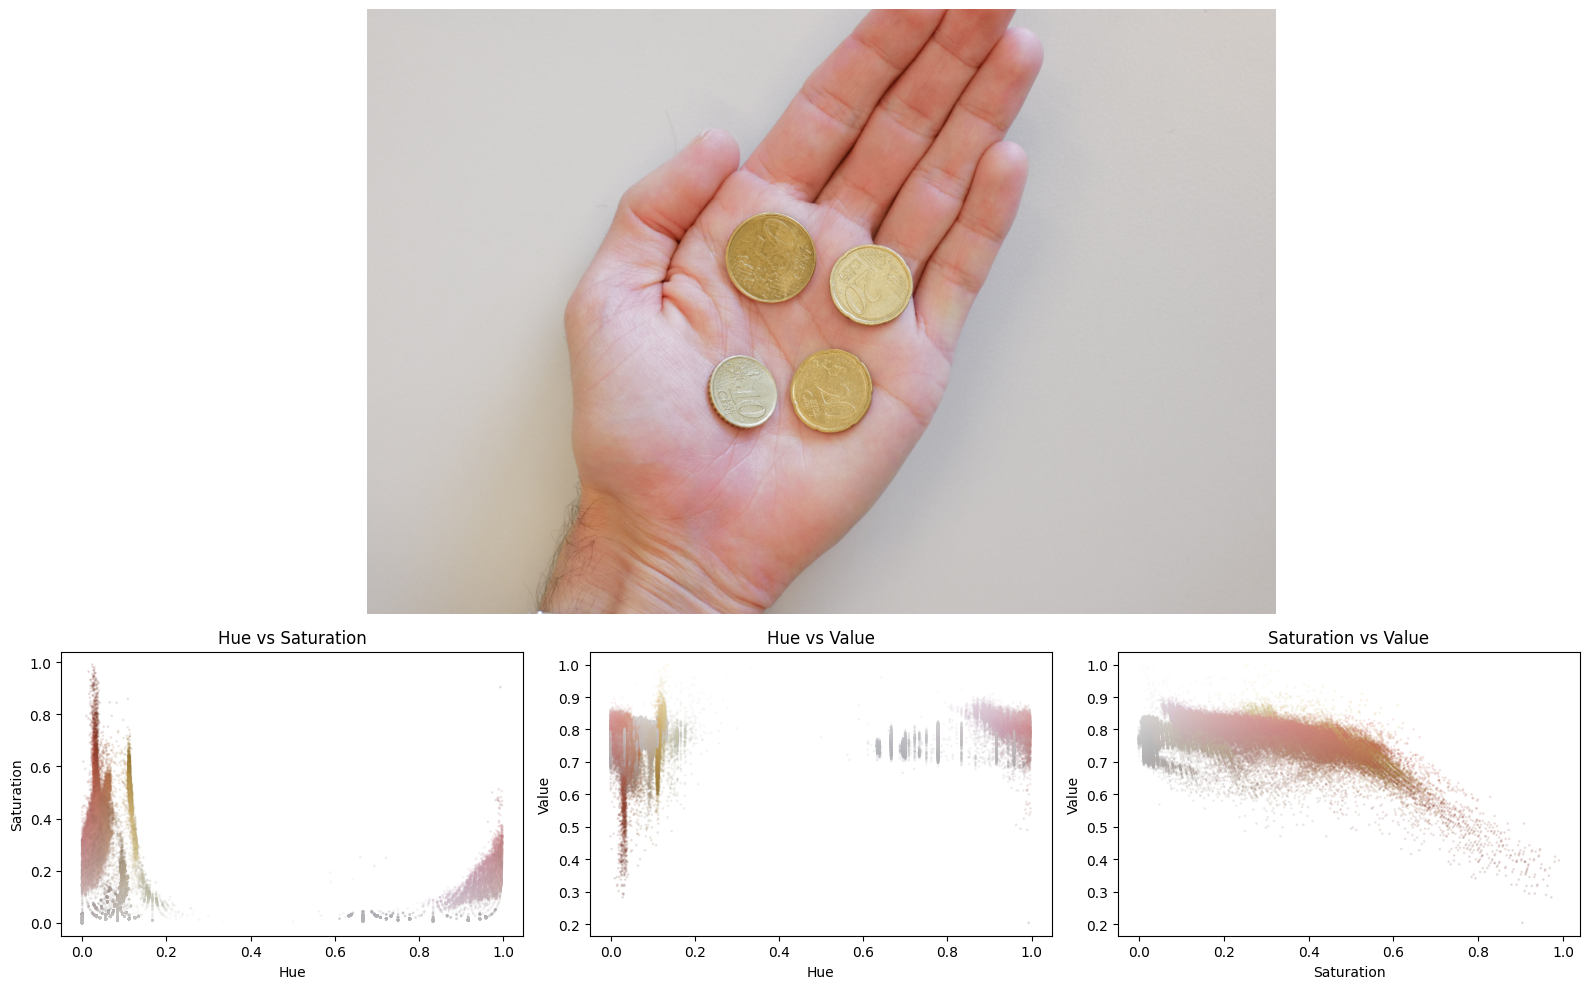

In [886]:
plot_colors_histo(img_test, extract_hsv_channels, labels=['Hue', 'Saturation', 'Value'])

In [793]:
# Convert img_final to a 8-bit unsigned integer image
img_final = img_final.astype(np.uint8)

# Apply the mask
masked_img = cv2.bitwise_and(img_original, img_original, mask=img_final)

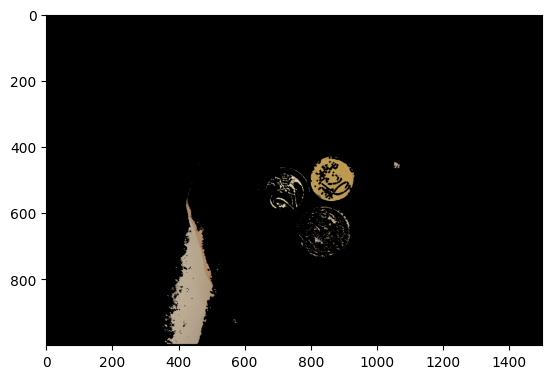

In [794]:
plt.imshow(masked_img)

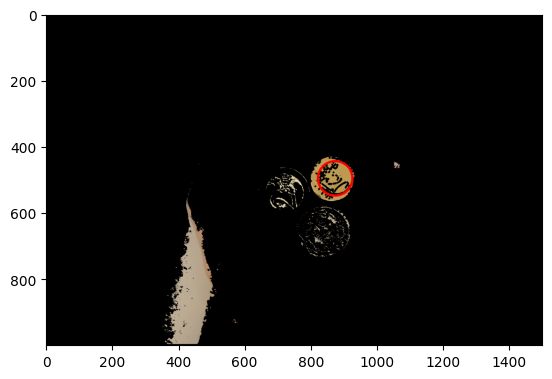

In [795]:
plt.imshow(detect_coin(masked_img, 30, 80, 5))

In [796]:
im_test = imgs_array[8]
imgray = cv.cvtColor(im_test, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)